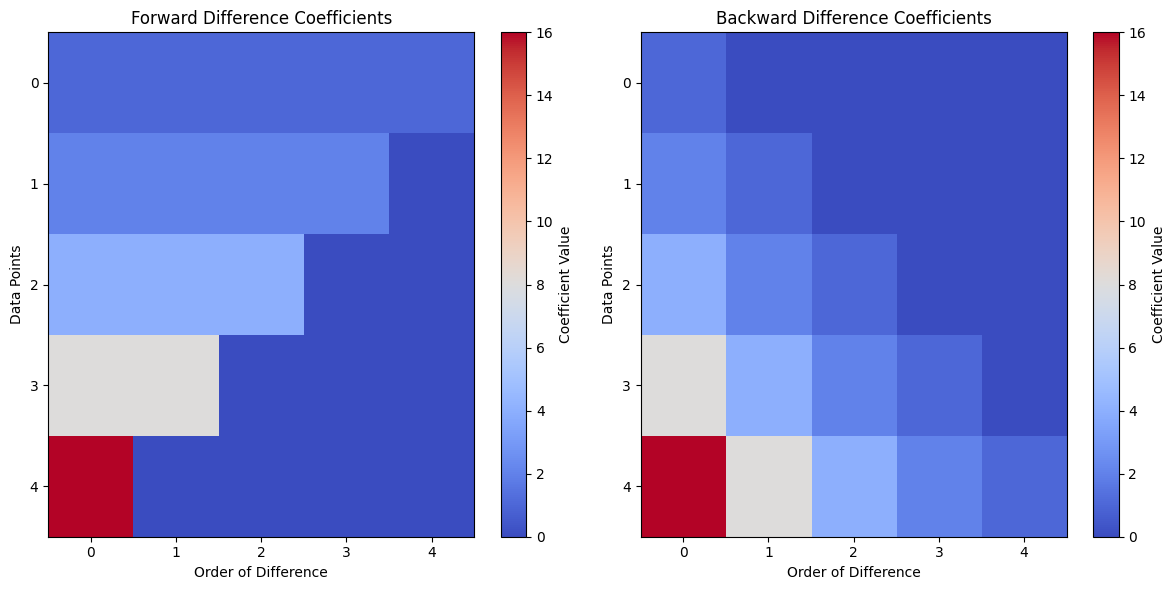

Interpolated value at xi using forward difference formula: 2.6944635416666665
Interpolated value at xi using backward difference formula: 1.0


In [3]:
import numpy as np
import matplotlib.pyplot as plt

def forward_difference_coefficients(y):
    n = len(y)
    coeffs = np.zeros((n, n))
    coeffs[:, 0] = y
    
    for j in range(1, n):
        for i in range(n - j):
            coeffs[i, j] = coeffs[i+1, j-1] - coeffs[i, j-1]
            
    return coeffs

def backward_difference_coefficients(y):
    n = len(y)
    coeffs = np.zeros((n, n))
    coeffs[:, 0] = y
    
    for j in range(1, n):
        for i in range(j, n):
            coeffs[i, j] = coeffs[i, j-1] - coeffs[i-1, j-1]
            
    return coeffs

def newton_interpolation(x, y, coeffs, xi):
    n = len(x)
    h = x[1] - x[0]
    
    fxi = coeffs[0, 0]
    for j in range(1, n):
        term = coeffs[0, j]
        for i in range(j):
            term *= (xi - x[i]) / ((j+1) * h)
        fxi += term
        
    return fxi

# Data points
x = np.array([0, 1, 2, 3, 4])
y = np.array([1, 2, 4, 8, 16])

# Coefficients for forward and backward difference formula
coeffs_forward = forward_difference_coefficients(y)
coeffs_backward = backward_difference_coefficients(y)

# Visualization of coefficients
plt.figure(figsize=(12, 6))

# Forward Difference Coefficients
plt.subplot(1, 2, 1)
plt.imshow(coeffs_forward, cmap='coolwarm', aspect='auto')
plt.title('Forward Difference Coefficients')
plt.xlabel('Order of Difference')
plt.ylabel('Data Points')
plt.colorbar(label='Coefficient Value')

# Backward Difference Coefficients
plt.subplot(1, 2, 2)
plt.imshow(coeffs_backward, cmap='coolwarm', aspect='auto')
plt.title('Backward Difference Coefficients')
plt.xlabel('Order of Difference')
plt.ylabel('Data Points')
plt.colorbar(label='Coefficient Value')

plt.tight_layout()
plt.show()

# Interpolation
xi = 2.5
forward_interpolation = newton_interpolation(x, y, coeffs_forward, xi)
backward_interpolation = newton_interpolation(x, y, coeffs_backward, xi)

print("Interpolated value at xi using forward difference formula:", forward_interpolation)
print("Interpolated value at xi using backward difference formula:", backward_interpolation)
